# Description 
- Nội dung: dữ liệu ghi lại thông tin các vụ phóng tên lửa từ năm 1957
- Nguồn: https://www.kaggle.com/agirlcoding/all-space-missions-from-1957
- Cách thức dữ liệu được lấy: dữ liệu được scrap từ trang https://nextspaceflight.com/launches/past/?page=1 từ ngày 7/8/2020 trở về trước

# Import libraries

In [645]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

# Import file

In [646]:
spaceLaunch_df = pd.read_csv("Space_Corrected.csv")
spaceLaunch_df.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


# Explore

In [647]:
#Dữ liệu gồm 4324 dòng và 9 cột
spaceLaunch_df.shape

(4324, 9)

In [648]:
# 9 cột tương ứng là 'Unnamed: 0','Unnamed: 0.1','Company Name','Location','Datum','Detail','Status Rocket',' Rocket','Status Mission'
spaceLaunch_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Company Name', 'Location', 'Datum',
       'Detail', 'Status Rocket', ' Rocket', 'Status Mission'],
      dtype='object')

In [649]:
#Kiểu dữ liệu của các trường
spaceLaunch_df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
Company Name      object
Location          object
Datum             object
Detail            object
Status Rocket     object
 Rocket           object
Status Mission    object
dtype: object

In [650]:
#Tỉ lệ giá trị rỗng trong từng cột
for column in spaceLaunch_df.columns:
    print(column, str(round( 100* spaceLaunch_df[column].isnull().sum() / len(spaceLaunch_df[column]),2)) + '%')

Unnamed: 0 0.0%
Unnamed: 0.1 0.0%
Company Name 0.0%
Location 0.0%
Datum 0.0%
Detail 0.0%
Status Rocket 0.0%
 Rocket 77.71%
Status Mission 0.0%


## Ý nghĩa các cột dữ liệu
- Unnamed: 0,Unnamed: 0.1: (int) trường index
- Company Name: (int) tên của công ty thực hiện vụ phóng
- Location: (object) địa điểm xảy ra vụ phóng
- Datum: (object) Thời điểm vụ phóng xả ra
- Detail: (object) Phân lớp/Tên của loại tên lửa
- Status Rocket: (object) Tình trạng của tên lửa (đang còn sử dụng/không còn sử dụng)
- Rocket: (object) Chi phí cho tên lửa
- Status Mission: (object) Kết quả của vụ phóng
    

In [651]:
# Xác định các kiểu dữ liệu có thể có của object
def open_object_dtype(s):
    dtypes = set()
    
    # YOUR CODE HERE
    for i in range(len(s)):
        dtypes.add(type(s.iloc[i]))
    
    return dtypes

In [652]:
# Company Name: (object) tên của công ty thực hiện vụ phóng (56 công ty)
print(len(spaceLaunch_df["Company Name"].unique()))
open_object_dtype(spaceLaunch_df["Location"])

56


{str}

In [653]:
# Location: (object) địa điểm xảy ra vụ phóng (137 địa điểm)
print(len(spaceLaunch_df["Location"].unique()))
open_object_dtype(spaceLaunch_df["Location"])

137


{str}

In [654]:
# Datum: (object) Thời điểm vụ phóng xả ra 
open_object_dtype(spaceLaunch_df["Datum"])

{str}

In [655]:
# Detail: (object) Phân lớp/Tên của loại tên lửa (4278 giá trị phân biệt)
print(len(spaceLaunch_df["Detail"].unique()))
open_object_dtype(spaceLaunch_df["Detail"])

4278


{str}

In [656]:
# Status Rocket: (object) Tình trạng của tên lửa (đang còn sử dụng/không còn sử dụng)
print(len(spaceLaunch_df["Status Rocket"].unique()))
open_object_dtype(spaceLaunch_df["Status Rocket"])

2


{str}

In [657]:
# Rocket: (object) Chi phí cho tên lửa
open_object_dtype(spaceLaunch_df[" Rocket"])

{float, str}

In [658]:
# Status Mission: (object) Kết quả của vụ phóng (Success/Failure/Prelaunch Failure/Partial Failure)
spaceLaunch_df["Status Mission"].unique()
open_object_dtype(spaceLaunch_df["Status Mission"])

{str}

# Data Preprocessing

In [659]:
#Bỏ đi 2 cột Unnamed: 0 và Unnamed: 0.1 vì không cần thiết
del spaceLaunch_df["Unnamed: 0"]
del spaceLaunch_df["Unnamed: 0.1"]

In [660]:
#Tên cột Rocket bị dư một dấu cách phía trước, không để ý có thể gây lỗi nên cần được bỏ dấu cách đi
spaceLaunch_df = spaceLaunch_df.rename(columns= {" Rocket" : "Rocket"})

#Convert cột rocket sang kiểu Float và lấp những giá trị null bằng 0
spaceLaunch_df["Rocket"] = spaceLaunch_df["Rocket"].astype(str)
for i in range(len(spaceLaunch_df["Rocket"])):
    spaceLaunch_df["Rocket"][i] = spaceLaunch_df["Rocket"][i].strip(", ")
    spaceLaunch_df["Rocket"][i] = spaceLaunch_df["Rocket"][i].replace(",","")
spaceLaunch_df["Rocket"] = spaceLaunch_df["Rocket"].astype(float)
spaceLaunch_df["Rocket"] = spaceLaunch_df["Rocket"].fillna(0)

In [661]:
#Cột Datum là kiểu dữ liệu object cần được chuyển sang dạng datetime
spaceLaunch_df["Datum"] = pd.to_datetime(spaceLaunch_df["Datum"])

#Tạo thêm cột month, year
spaceLaunch_df["year"] = spaceLaunch_df["Datum"].apply(lambda datetime: datetime.year)
spaceLaunch_df["month"] = spaceLaunch_df["Datum"].apply(lambda datetime: datetime.month)

#Tạo thêm cột country
spaceLaunch_df["country"] = spaceLaunch_df["Location"].apply(lambda country: country.split(", ")[-1])

In [662]:
#Các nhiệm vụ phóng được thực hiện tại Kazakhstan đều được thực hiện bởi các công ty Nga
#nên ta cần đổi giá trị của cột country mà là Kazakhstan thành Russia mà trước năm 1991 là Liên Xô (USSR)
for i in range(len(spaceLaunch_df["country"])):
    if (spaceLaunch_df["country"].loc[i] == "Kazakhstan"):
        if(spaceLaunch_df["year"].loc[i] < 1991):
            spaceLaunch_df["country"].loc[i] = "USSR"
        else:
            spaceLaunch_df["country"].loc[i] = "Russia"
    # Một vài đại điểm phóng tại Nga trước năm 1991 vẫn lưu là Nga nên ta đổi thành USSR
    if (spaceLaunch_df["country"].loc[i] == "Russia" and spaceLaunch_df["year"].loc[i] < 1991):
        spaceLaunch_df["country"].loc[i] = "USSR"

#Tương tự với một số địa điểm khác trên thế giới
spaceLaunch_df.loc[spaceLaunch_df['country'] == 'New Mexico', 'country'] = 'USA'
spaceLaunch_df.loc[spaceLaunch_df['country'] == "Yellow Sea", 'country'] = "China"
spaceLaunch_df.loc[spaceLaunch_df['country'] == "Shahrud Missile Test Site", 'country'] = "Iran"
spaceLaunch_df.loc[spaceLaunch_df['country'] == "Pacific Missile Range Facility", 'country'] = "USA"
spaceLaunch_df.loc[spaceLaunch_df['country'] == "Barents Sea", 'country'] = 'Russia'
spaceLaunch_df.loc[spaceLaunch_df['country'] == "Gran Canaria", 'country'] = 'USA'

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Dữ liệu sau tiền xử lý

In [663]:
spaceLaunch_df.head(5)

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,year,month,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020,8,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,8,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,2020,8,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020,7,Russia
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020,7,USA


In [664]:
spaceLaunch_df.dtypes

Company Name       object
Location           object
Datum              object
Detail             object
Status Rocket      object
Rocket            float64
Status Mission     object
year                int64
month               int64
country            object
dtype: object

# Analysis

## Question 1: Diễn biến hiện tại của cuộc lên vũ trụ như thế nào?
Ý nghĩa: Trả lời cho câu hỏi sẽ giúp ta có cái nhìn tổng quan hơn về cuộc đua lên vũ trụ của các nước trên thế giới, đây là một chủ đề khá thú vị vì Việt Nam chúng ta cũng đã thực hiện phóng 2 vệ tinh mang tên Vinasat-1 và Vinasat-2 năm 2008 và 2012, chúng ta nên biết vị trí của chúng ta đang ở đâu để có thể cố gắng hơn nữa để đưa Việt Nam sánh ngang cường quốc năm châu

In [667]:
spaceLaunch_df.iloc[100]["Detail"]

'H-IIB | HTV-8'

In [671]:
#Ta tìm xem thử 2 vệ tinh Vinasat-1 và Vinasat-2 của Việt Nam
for i in range(spaceLaunch_df.shape[0]):
    if spaceLaunch_df.iloc[i]["Detail"].find("Vinasat") != -1:
        #2 vệ tinh này do Pháp phóng nhưng vẫn là tài sản của Việt Nam nên mình sẽ đổi tên trường country thành Việt Nam
        spaceLaunch_df.iloc[i]["country"] = "Viet Nam"
        print(spaceLaunch_df.iloc[i])

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Company Name                                            Arianespace
Location          ELA-3, Guiana Space Centre, French Guiana, France
Datum                                     2012-05-15 22:13:00+00:00
Detail                           Ariane 5 ECA | JCSAT-13, Vinasat-2
Status Rocket                                          StatusActive
Rocket                                                          200
Status Mission                                              Success
year                                                           2012
month                                                             5
country                                                      France
Name: 649, dtype: object
Company Name                                            Arianespace
Location          ELA-3, Guiana Space Centre, French Guiana, France
Datum                                     2008-04-18 22:17:00+00:00
Detail                       Ariane 5 ECA | Star One C2 & Vinasat-1
Status Rocket          

Text(0.5, 0, 'Number of active sattellite')

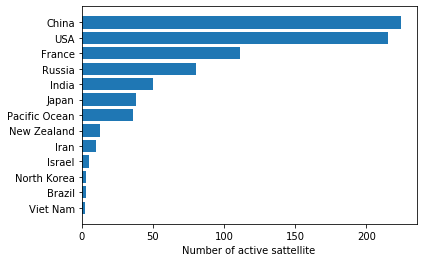

In [484]:
#Tỉ lệ tên lửa đã phóng và đang còn hoạt động của các quốc gia trên thế giới
active_df = spaceLaunch_df[spaceLaunch_df["Status Rocket"] == "StatusActive"]
active_country_df = active_df.groupby("country")["Status Rocket"].count().sort_values().reset_index()
plt.barh(active_country_df["country"],active_country_df["Status Rocket"])
plt.xlabel("Number of active sattellite")

Với số lượng là 2 vệ tinh thì có lẽ chúng ta đang còn thua xa các cường quốc khác

In [485]:
launchCountry = spaceLaunch_df.groupby(["year","country"])["Status Mission"].count()
launchCountry = launchCountry.reset_index().sort_values(["year","Status Mission"],ascending = False)
launchCountry = pd.concat([group[1].head(1) for group in launchCountry.groupby(['year'])])

#Biểu đồ các nước dẫn đầu trong cuộc đua lên vũ trụ qua từng năm dựa theo số vụ phóng trong năm đó
fig = px.bar(launchCountry, x="year", y="Status Mission", color='country')
fig.show()

Mình khá bất ngờ với kết quả này vì bình thường trên truyền thông ta được nghe nhiều hơn về các vụ phóng của các
cường quốc như Mỹ, Nga, Ấn Độ nhưng thật không ngờ Trung Quốc đã vượt mặt các cường quốc trên trong những năm gần đây 
cả về tổng số nhiệm vụ phóng và cả về tổng số vệ tinh đang hoạt động trên quỹ đạo, điều này dẫn đến một thắc mắc nữa của mình là từ khi nào và từ đâu?

## Question 2: Từ khi nào và nhờ đâu Trung Quốc vươn lên dẫn đầu ngành công nghiệp vũ trụ như vậy? 
Ý nghĩa: sau khi ta trả lời câu hỏi trên ta sẽ thấy được sự vươn lên mạnh mẽ của Trung Quốc trong ngành công nghiệp hàng không vũ trụ rồi từ đó có thể mở rộng ra các lĩnh vực khác để có cái nhìn bao quát hơn về sự phát triển của Trung Quốc. Đó sẽ là thông tin, bài học quý giá cho Việt Nam chúng ta bởi vì biết người biết ta, trăm trận trăm thắng.

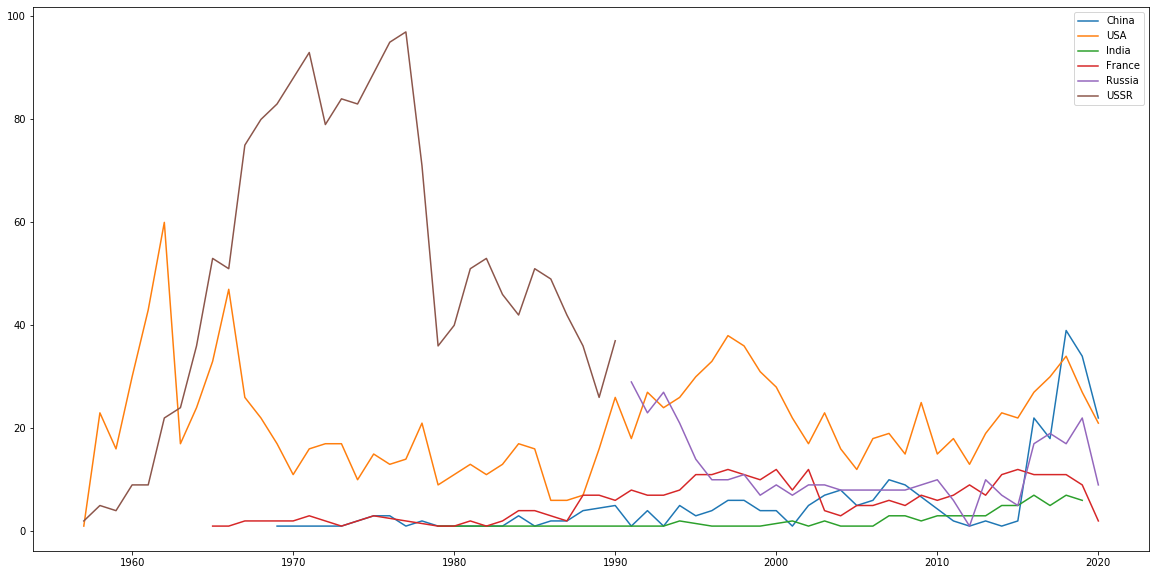

In [525]:
#Ta lấy kết quả từ câu 1 để lấy ra 5 nước top đầu rồi vẽ biểu đồ lịch sử nhiệm vụ phóng tàu ra vũ trụ
launch_Country = spaceLaunch_df.groupby(["country","year"])["Status Mission"].count().reset_index()
plt.figure(figsize = (20,10))
plt.plot(launch_Country[launch_Country["country"] == "China"]["year"],
         launch_Country[launch_Country["country"] == "China"]["Status Mission"], label = "China")
plt.plot(launch_Country[launch_Country["country"] == "USA"]["year"],
         launch_Country[launch_Country["country"] == "USA"]["Status Mission"], label = "USA")
plt.plot(launch_Country[launch_Country["country"] == "India"]["year"],
         launch_Country[launch_Country["country"] == "India"]["Status Mission"], label = "India")
plt.plot(launch_Country[launch_Country["country"] == "France"]["year"],
         launch_Country[launch_Country["country"] == "France"]["Status Mission"], label = "France")

#Trước năm 1991 ta lưu là Liên Xô nên vẽ 2 đường Liên Xô và Nga riêng
plt.plot(launch_Country[launch_Country["country"] == "Russia"]["year"],
         launch_Country[launch_Country["country"] == "Russia"]["Status Mission"], label = "Russia")
plt.plot(launch_Country[launch_Country["country"] == "USSR"]["year"],
         launch_Country[launch_Country["country"] == "USSR"]["Status Mission"], label = "USSR")
plt.legend()


Từ biểu đồ này ta có thể thấy trước 2017 gần như là Mỹ và Nga thay nhau đứng đầu về số lượng nhiệm vụ ra ngoài không gian, nhưng những năm gần đây thì Trung Quốc lại nổi lên một cách mạnh mẽ vượt qua 2 cường quốc kia dù là nước đi sau trong cuộc đua không gian này, liệu ta có thể hiểu thêm bằng cách phân tích cuộc đua của các công ty qua các năm?

<BarContainer object of 6 artists>

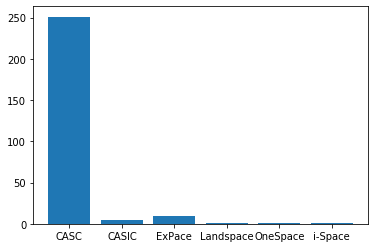

In [531]:
spaceLaunch_China_df = spaceLaunch_df[spaceLaunch_df["country"] == "China"]
China_companies = spaceLaunch_China_df.groupby(["Company Name"])["Status Mission"].count()
plt.bar(China_companies.index,China_companies.values)

CASC là một công ty nhà nước của Trung Quốc về khoa học hàng không vũ trụ, ta xem xét thử sự phát triển của công ty này

<BarContainer object of 10 artists>

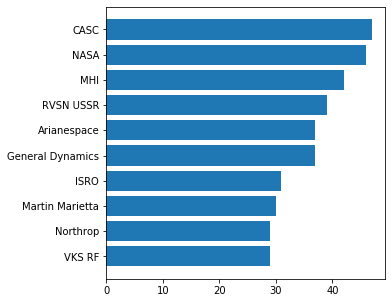

In [547]:
#Biểu đồ số năm kinh nghiệm phóng tàu vũ trụ của top 10 các công ty về hàng không vũ trụ dựa theo số năm phóng 
companies_exp_df = spaceLaunch_df.groupby(["Company Name"])["year"].nunique().sort_values().tail(10)
plt.figure(figsize = (5,5))
plt.barh(companies_exp_df.index,companies_exp_df.values)

Có thể thấy rằng công ty này của Trung Quốc có tuổi đời kinh nghiệm trong việc phóng tàu vũ trụ lâu nhất trong các công ty lớn

<BarContainer object of 47 artists>

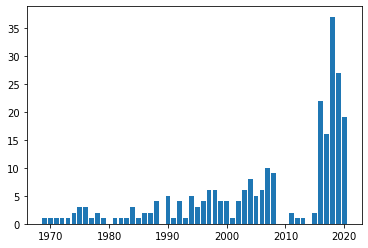

In [548]:
CASC = spaceLaunch_China_df[spaceLaunch_China_df["Company Name"] == "CASC"]
CASC = CASC.groupby("year")["Status Mission"].count().reset_index()
plt.bar(CASC["year"],CASC["Status Mission"])

Nếu kết hợp với việc tìm kiếm thông tin trên google về sự phát triển của khoa học công nghệ ở Trung Quốc thì cũng thấy có sự tương đồng về thời điểm khi năm 2016 cũng là năm Trung Quốc vượt mặt Mỹ và là nước có sống lượng bài báo khoa học được công bố nhiều nhất trên thế giới và là năm Trung Quốc thông qua luật an ninh mạng quốc gia yêu cầu mọi công ty nước ngoài làm ăn tại Trung Quốc phải lưu ít nhất 6 tháng dữ liệu ngay bên trong Trung Quốc. Cho thấy Trung Quốc có tham vọng rất to lớn kiểm soát thông tin trong nước và trở thành một cường quốc công nghệ trên thế giới, mặt khác số lượng tên lửa được phóng ra ngoài không gian tăng vọt có thể liên quan đến sự đầu tư, phát triển, áp dụng rộng rãi của công nghệ trí tuệ nhân tạo, nhận diện khuôn mặt và hệ thống giám sát, chấm điểm công dân của Trung Quốc, gây ra nhiều tranh cãi trong cộng đồng quốc tế. Từ đó có thể suy ra nguyên nhân ngành công nghiệp hàng không vũ trụ của Trung Quốc phát triển mạnh là nhờ kinh nghiệm lâu năm, sự phát triển mạnh mẽ của khoa học trong nước cùng sự đầu tư mạnh mẽ của chính phủ nhằm các mục đích an ninh, chính trị, kinh tế khác.

## Question 3: Sự phát triển của ngành công nghiệp khoa học vũ trụ sẽ đi đến đâu?